In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import datetime as dt
import time

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [258]:
#Reading the dataset and filtering out the most relevant column

url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
df = pd.read_csv(url)
df = df[['airline_sentiment','airline','text','tweet_created']]


In [259]:
#Adding some features to the dataset

#Using lambda function to convert only to YYYY-MM-DD
'''
def func_split(str_):
    return str_.split(' ')[0]

df['Date'] = df.apply(lambda x: func_split(x['tweet_created']),axis=1)
'''

#Using pandas datetime function to convert it directly

df['Date'] = pd.to_datetime(df['tweet_created'],infer_datetime_format=True)
df = df.drop('tweet_created',axis=1)
df.set_index('Date',inplace=True,drop=True)
df.sort_index(inplace=True)



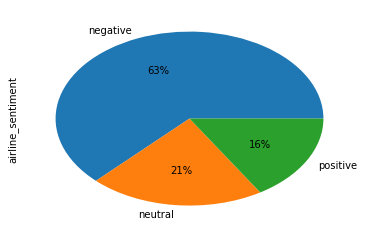

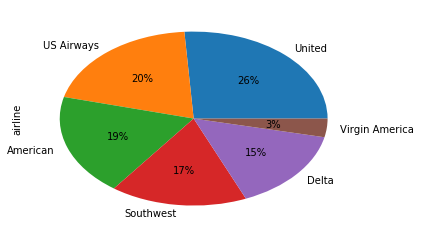

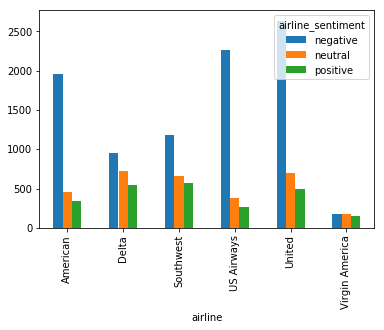

In [260]:
#Graphical Analysis

#Shows the number of negative, postive,neutral sentiments in percentage

df['airline_sentiment'].value_counts().plot(kind='pie',autopct = '%1.0f%%')
plt.show()

#Count of the airline percentage of tweets received
df['airline'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

#Count specific positive,negative,neutral sentiments

airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
plt.show()

In [261]:
#Extracting the features and the label
features = df['text'].values
labels = df['airline_sentiment'].values


In [262]:
#Preprocessing the data

processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [263]:
#Removing stopwords

stop_words_ = set(stopwords.words('english'))
filter_stopwords = []

for sent in processed_features:
    words = word_tokenize(sent)
    filtered_sentence = []
    for w in words:
        if(w not in stop_words_):
            filtered_sentence.append(w)
            
    sentence =' '.join(filtered_sentence)
    filter_stopwords.append(sentence)





In [264]:
#Coverting it to stem words but not so useful
'''
ps = PorterStemmer()

filter_stemwords  = []


for sent in filter_stopwords:
    words = word_tokenize(sent)
    filtered_stem = []
    for w in words:
        filtered_stem.append(ps.stem(w))
        
    sentence =' '.join(filtered_stem)
    filter_stemwords.append(sentence)
    
'''
    

"\nps = PorterStemmer()\n\nfilter_stemwords  = []\n\n\nfor sent in filter_stopwords:\n    words = word_tokenize(sent)\n    filtered_stem = []\n    for w in words:\n        filtered_stem.append(ps.stem(w))\n        \n    sentence =' '.join(filtered_stem)\n    filter_stemwords.append(sentence)\n    \n"

In [265]:
#Lemmatizing the words

lemmatizer = WordNetLemmatizer() 

processed_features = []


for sent in filter_stopwords:
    words = word_tokenize(sent)
    filter_lemma = []
    for w in words:
        filter_lemma.append(lemmatizer.lemmatize(w))
        
    sentence = ' '.join(filter_lemma)
    processed_features.append(sentence)
    


In [266]:
#Usind Bag-of-words technique to extract meaninful most frequent features from the tweets

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.85)
processed_features = vectorizer.fit_transform(processed_features).toarray()

#print(processed_features)

In [267]:
#Now it's training time, as the features are converted into numerical data with can be trained on by the ML algorithms
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)
print('Completed')

Completed


In [269]:
#Training the Algorithms
time_taken = []
'''
#Random Forests
start = time.time()
rf = RandomForestClassifier(n_estimators=150, random_state=0)
rf.fit(X_train, y_train)

end = time.time()
time_taken.append(end-start)


#ExtraTree Classifier - Variant of Random Forests
start = time.time()
etc = ExtraTreesClassifier(n_estimators = 100, max_depth = 10,random_state = 0)
etc.fit(X_train, y_train)

end = time.time()
time_taken.append(end-start)

#XGBoost
start = time.time()
xgb = xgb.XGBClassifier(objective = "multi:softprob", max_depth = 10, n_estimators = 50, learning_rate = 0.25, gamma = 0.4, min_child_weight = 100, nthread = -1, seed = 0) 
xgb.fit(X_train, y_train)

end = time.time()
time_taken.append(end-start)

#Multi-class Naive Bayes
start = time.time()
nb = GaussianNB()
nb.fit(X_train,y_train)

end = time.time()
time_taken.append(end-start)
'''

print('Completed')

Completed


In [271]:
#Saving the trained classifier in a pickle file, which can be loaded  without training the classifier again

import pickle
'''
pickle_rf = open('RF_Classifier.pickle','wb')
pickle.dump(rf,pickle_rf)
pickle_rf.close()

pickle_etc = open('ETC_Classifier.pickle','wb')
pickle.dump(etc,pickle_etc)
pickle_etc.close()

pickle_xgb = open('XGB_Classifier.pickle','wb')
pickle.dump(xgb,pickle_xgb)
pickle_xgb.close()

pickle_nb = open('NB_Classifier.pickle','wb')
pickle.dump(nb,pickle_nb)
pickle_nb.close()

'''
pickle_rf_in = open('RF_Classifier.pickle','rb')
rf = pickle.load(pickle_rf_in)

pickle_etc_in = open('RF_Classifier.pickle','rb')
etc = pickle.load(pickle_etc_in)

pickle_xgb_in = open('RF_Classifier.pickle','rb')
xgb = pickle.load(pickle_xgb_in)

pickle_nb_in = open('RF_Classifier.pickle','rb')
nb = pickle.load(pickle_nb_in)


"\npickle_rf_in = open('RF_Classifier.pickle','rb')\nrf = pickle.load(pickle_rf_in)\n\npickle_etc_in = open('RF_Classifier.pickle','rb')\netc = pickle.load(pickle_etc_in)\n\npickle_xgb_in = open('RF_Classifier.pickle','rb')\nxgb = pickle.load(pickle_xgb_in)\n\npickle_nb_in = open('RF_Classifier.pickle','rb')\nnb = pickle.load(pickle_nb_in)\n"

In [274]:
#Making Prediction on Unseen Data from the Training Set
predictions_etc = etc.predict(X_test)
predictions_rf = rf.predict(X_test)
predictions_xgb = xgb.predict(X_test)
predictions_nb = nb.predict(X_test)

print('Completed')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Completed


In [279]:
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))
scores = []

print("Random Forest :",accuracy_score(y_test, predictions_rf))
print("Extra Tree :",accuracy_score(y_test, predictions_etc))
print("XGBoost :",accuracy_score(y_test, predictions_xgb))
print("Naive Bayes :",accuracy_score(y_test, predictions_nb))

scores = [accuracy_score(y_test, predictions_rf),accuracy_score(y_test, predictions_xgb),accuracy_score(y_test, predictions_etc),accuracy_score(y_test, predictions_nb)]
print('Completed')

Random Forest : 0.7641165755919854
Extra Tree : 0.6438979963570127
XGBoost : 0.7176684881602914
Naive Bayes : 0.401183970856102
Completed


[0.7641165755919854, 0.7176684881602914, 0.6438979963570127, 0.401183970856102]
[37.23889088630676, 7.9816529750823975, 78.43189311027527, 0.5874309539794922]


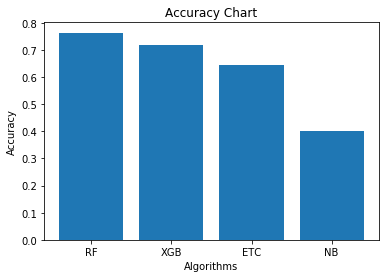

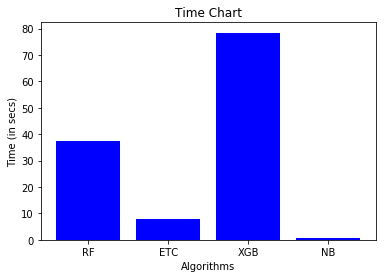

In [284]:
print(scores)
print(time_taken)
algo = ['RF','XGB','ETC','NB']

plt.title('Accuracy Chart')
y_pos = np.arange(len(algo))

# Create bars
plt.bar(y_pos, scores)
 
# Create names on the x-axis
plt.xticks(y_pos, algo)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Accuracy',fontsize = 10)

# Show graphic
plt.show()


algo = ['RF','ETC','XGB','NB']
plt.title('Time Chart')
y_pos = np.arange(len(algo))

# Create bars
plt.bar(y_pos, time_taken,color='blue')
 
# Create names on the x-axis
plt.xticks(y_pos, algo)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Time (in secs)',fontsize = 10)

# Show graphic
plt.show()

